In [7]:
from src.data.load_data import convert_to_torch_dataset, load_sample_train_test
from src.utils.misc import init_notebook

In [8]:
n_jobs = -1  # pour le parallélisme
init_notebook()

Generator(PCG64) at 0x2376644EEA0

In [20]:
x_train, x_test, y_train, y_test = load_sample_train_test()

In [21]:
data = convert_to_torch_dataset(x_train, y_train)
data_loader = data

In [22]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Hyperparamètres
latent_dim = 100
lr = 0.0002
batch_size = 128
epochs = 200
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
)

# Dataset MNIST
# dataloader = torch.utils.data.DataLoader(
#     torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform),
#     batch_size=batch_size, shuffle=True
# )
dataloader = data_loader

In [23]:
# Générateur
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)


# Discriminateur
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

In [24]:
# Initialisation
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimiseurs
opt_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCELoss()

Epoch [1/200]  D_loss: 1.0790  G_loss: 0.4697
Epoch [2/200]  D_loss: 0.8300  G_loss: 0.6626
Epoch [3/200]  D_loss: 0.7818  G_loss: 0.6637
Epoch [4/200]  D_loss: 0.6858  G_loss: 0.7529
Epoch [5/200]  D_loss: 0.6707  G_loss: 0.7553
Epoch [6/200]  D_loss: 0.6895  G_loss: 0.7324
Epoch [7/200]  D_loss: 0.6495  G_loss: 0.8014
Epoch [8/200]  D_loss: 0.6750  G_loss: 0.7795
Epoch [9/200]  D_loss: 0.6068  G_loss: 0.8555
Epoch [10/200]  D_loss: 0.6195  G_loss: 0.8282


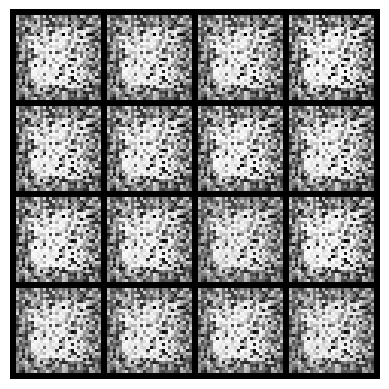

Epoch [11/200]  D_loss: 0.5628  G_loss: 0.8920
Epoch [12/200]  D_loss: 0.5550  G_loss: 0.9078
Epoch [13/200]  D_loss: 0.5671  G_loss: 0.9020
Epoch [14/200]  D_loss: 0.5620  G_loss: 0.9126
Epoch [15/200]  D_loss: 0.6125  G_loss: 0.8542
Epoch [16/200]  D_loss: 0.5152  G_loss: 1.0127
Epoch [17/200]  D_loss: 0.4880  G_loss: 1.0189
Epoch [18/200]  D_loss: 0.4832  G_loss: 0.9897
Epoch [19/200]  D_loss: 0.4650  G_loss: 1.0222
Epoch [20/200]  D_loss: 0.4554  G_loss: 1.0531


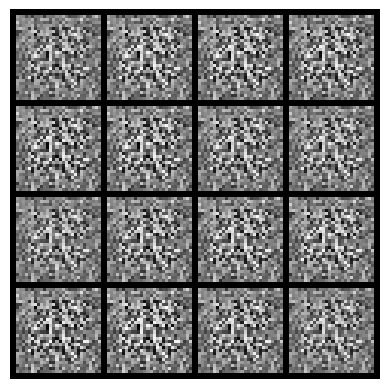

Epoch [21/200]  D_loss: 0.4273  G_loss: 1.1380
Epoch [22/200]  D_loss: 0.4540  G_loss: 1.1402
Epoch [23/200]  D_loss: 0.4267  G_loss: 1.2022
Epoch [24/200]  D_loss: 0.3832  G_loss: 1.2257
Epoch [25/200]  D_loss: 0.3774  G_loss: 1.2735
Epoch [26/200]  D_loss: 0.3498  G_loss: 1.3712
Epoch [27/200]  D_loss: 0.3292  G_loss: 1.3795
Epoch [28/200]  D_loss: 0.3994  G_loss: 1.4158
Epoch [29/200]  D_loss: 0.3334  G_loss: 1.6311
Epoch [30/200]  D_loss: 0.3842  G_loss: 1.5835


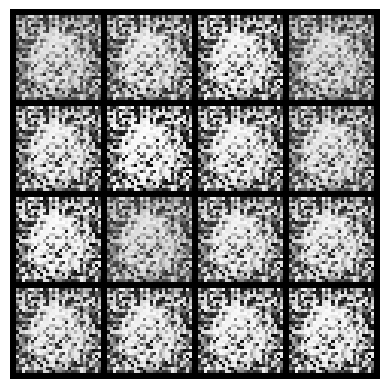

Epoch [31/200]  D_loss: 0.2981  G_loss: 1.4486
Epoch [32/200]  D_loss: 0.2710  G_loss: 1.5310
Epoch [33/200]  D_loss: 0.2515  G_loss: 1.5784
Epoch [34/200]  D_loss: 0.2286  G_loss: 1.6591
Epoch [35/200]  D_loss: 0.2632  G_loss: 1.5667
Epoch [36/200]  D_loss: 0.2487  G_loss: 1.9481
Epoch [37/200]  D_loss: 0.3468  G_loss: 1.7824
Epoch [38/200]  D_loss: 0.2182  G_loss: 1.8737
Epoch [39/200]  D_loss: 0.1793  G_loss: 2.0251
Epoch [40/200]  D_loss: 0.1613  G_loss: 2.1503


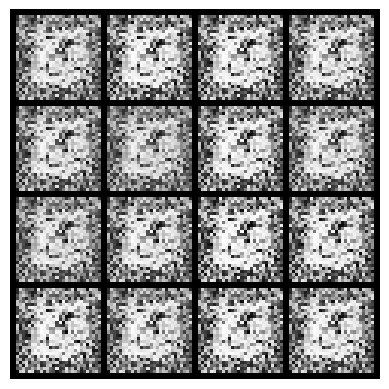

Epoch [41/200]  D_loss: 0.2031  G_loss: 2.0342
Epoch [42/200]  D_loss: 0.1806  G_loss: 2.3622
Epoch [43/200]  D_loss: 0.1914  G_loss: 2.3432
Epoch [44/200]  D_loss: 0.1439  G_loss: 2.3037
Epoch [45/200]  D_loss: 0.1363  G_loss: 2.3234
Epoch [46/200]  D_loss: 0.1179  G_loss: 2.5273
Epoch [47/200]  D_loss: 0.2273  G_loss: 2.3521
Epoch [48/200]  D_loss: 0.1211  G_loss: 2.7119
Epoch [49/200]  D_loss: 0.1117  G_loss: 2.6412
Epoch [50/200]  D_loss: 0.1083  G_loss: 2.6778


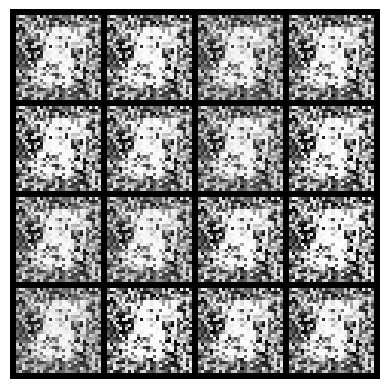

Epoch [51/200]  D_loss: 0.0959  G_loss: 2.7780
Epoch [52/200]  D_loss: 0.0707  G_loss: 2.9428
Epoch [53/200]  D_loss: 0.0842  G_loss: 2.8617
Epoch [54/200]  D_loss: 0.0635  G_loss: 3.0611
Epoch [55/200]  D_loss: 0.0615  G_loss: 3.1089
Epoch [56/200]  D_loss: 0.0660  G_loss: 3.1348
Epoch [57/200]  D_loss: 0.1643  G_loss: 1.8591
Epoch [58/200]  D_loss: 0.2445  G_loss: 2.9873
Epoch [59/200]  D_loss: 0.0933  G_loss: 3.0324
Epoch [60/200]  D_loss: 0.0767  G_loss: 2.9146


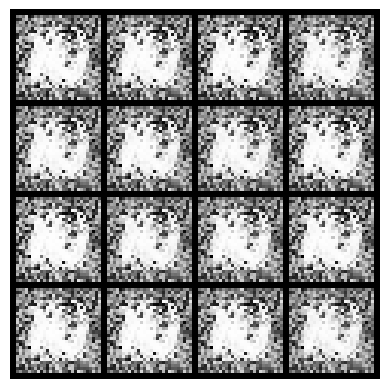

Epoch [61/200]  D_loss: 0.0558  G_loss: 3.1606
Epoch [62/200]  D_loss: 0.0688  G_loss: 3.0330
Epoch [63/200]  D_loss: 0.0534  G_loss: 3.3667
Epoch [64/200]  D_loss: 0.0456  G_loss: 3.5428
Epoch [65/200]  D_loss: 0.0866  G_loss: 3.1674
Epoch [66/200]  D_loss: 0.0767  G_loss: 3.3994
Epoch [67/200]  D_loss: 0.0729  G_loss: 3.3286
Epoch [68/200]  D_loss: 0.0600  G_loss: 3.3566
Epoch [69/200]  D_loss: 0.0381  G_loss: 3.6424
Epoch [70/200]  D_loss: 0.0301  G_loss: 3.8984


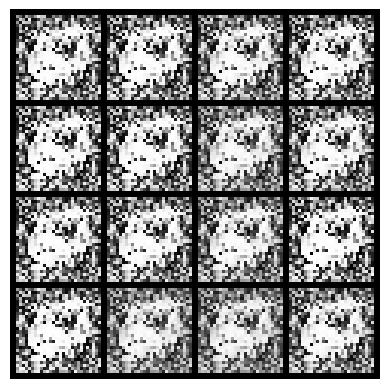

Epoch [71/200]  D_loss: 0.0305  G_loss: 3.9107
Epoch [72/200]  D_loss: 0.0349  G_loss: 3.7632
Epoch [73/200]  D_loss: 0.0200  G_loss: 4.2910
Epoch [74/200]  D_loss: 0.0347  G_loss: 3.8640
Epoch [75/200]  D_loss: 0.0549  G_loss: 3.8035
Epoch [76/200]  D_loss: 0.1274  G_loss: 3.2590
Epoch [77/200]  D_loss: 0.0538  G_loss: 3.6696
Epoch [78/200]  D_loss: 0.0348  G_loss: 3.9207
Epoch [79/200]  D_loss: 0.0248  G_loss: 4.0798
Epoch [80/200]  D_loss: 0.0260  G_loss: 4.1070


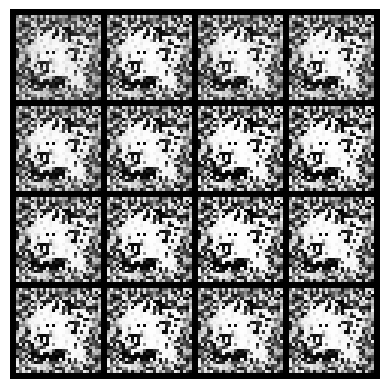

Epoch [81/200]  D_loss: 0.0223  G_loss: 4.2278
Epoch [82/200]  D_loss: 0.0215  G_loss: 4.2610
Epoch [83/200]  D_loss: 0.0288  G_loss: 3.9247
Epoch [84/200]  D_loss: 0.0168  G_loss: 4.5886
Epoch [85/200]  D_loss: 0.0238  G_loss: 4.3354
Epoch [86/200]  D_loss: 0.0214  G_loss: 4.4213
Epoch [87/200]  D_loss: 0.0163  G_loss: 4.8922
Epoch [88/200]  D_loss: 0.0262  G_loss: 4.5512
Epoch [89/200]  D_loss: 0.0184  G_loss: 4.5280
Epoch [90/200]  D_loss: 0.0360  G_loss: 3.8420


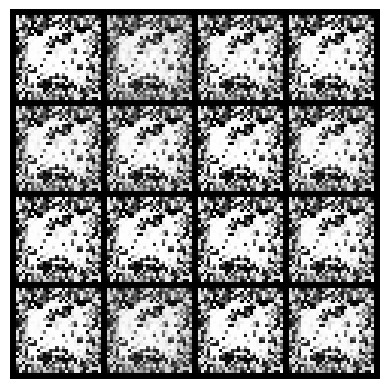

Epoch [91/200]  D_loss: 0.2752  G_loss: 3.2724
Epoch [92/200]  D_loss: 0.0223  G_loss: 4.4174
Epoch [93/200]  D_loss: 0.0155  G_loss: 4.6718
Epoch [94/200]  D_loss: 0.0331  G_loss: 4.1258
Epoch [95/200]  D_loss: 0.0867  G_loss: 3.7769
Epoch [96/200]  D_loss: 0.0232  G_loss: 4.6892
Epoch [97/200]  D_loss: 0.0179  G_loss: 4.9435
Epoch [98/200]  D_loss: 0.0325  G_loss: 4.5319
Epoch [99/200]  D_loss: 0.0333  G_loss: 4.2720
Epoch [100/200]  D_loss: 0.0095  G_loss: 5.1153


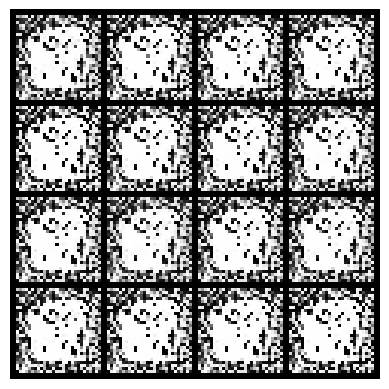

Epoch [101/200]  D_loss: 0.0101  G_loss: 5.0262
Epoch [102/200]  D_loss: 0.0123  G_loss: 4.8347
Epoch [103/200]  D_loss: 0.0166  G_loss: 4.6473
Epoch [104/200]  D_loss: 0.0091  G_loss: 5.1274
Epoch [105/200]  D_loss: 0.2372  G_loss: 4.0721
Epoch [106/200]  D_loss: 0.0546  G_loss: 4.2732
Epoch [107/200]  D_loss: 0.0151  G_loss: 5.4570
Epoch [108/200]  D_loss: 0.0201  G_loss: 4.9558
Epoch [109/200]  D_loss: 0.0501  G_loss: 4.1634
Epoch [110/200]  D_loss: 0.0277  G_loss: 4.4170


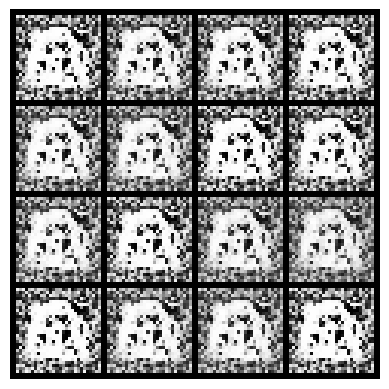

Epoch [111/200]  D_loss: 0.0140  G_loss: 4.8428
Epoch [112/200]  D_loss: 0.0187  G_loss: 4.5824
Epoch [113/200]  D_loss: 0.0138  G_loss: 4.9041
Epoch [114/200]  D_loss: 0.0077  G_loss: 5.3149
Epoch [115/200]  D_loss: 0.0069  G_loss: 5.4119
Epoch [116/200]  D_loss: 0.0051  G_loss: 5.6332
Epoch [117/200]  D_loss: 0.0051  G_loss: 5.6364
Epoch [118/200]  D_loss: 0.0039  G_loss: 5.8664
Epoch [119/200]  D_loss: 0.0030  G_loss: 6.1079
Epoch [120/200]  D_loss: 0.0019  G_loss: 6.4894


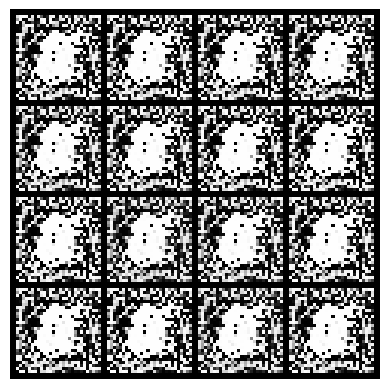

Epoch [121/200]  D_loss: 0.0023  G_loss: 6.3230
Epoch [122/200]  D_loss: 0.0018  G_loss: 6.4957
Epoch [123/200]  D_loss: 0.0020  G_loss: 6.4436
Epoch [124/200]  D_loss: 0.0015  G_loss: 6.7116
Epoch [125/200]  D_loss: 0.0011  G_loss: 6.9546
Epoch [126/200]  D_loss: 0.0011  G_loss: 6.9353
Epoch [127/200]  D_loss: 0.0011  G_loss: 6.9435
Epoch [128/200]  D_loss: 0.0011  G_loss: 6.9643
Epoch [129/200]  D_loss: 0.0011  G_loss: 6.9223
Epoch [130/200]  D_loss: 0.0011  G_loss: 6.9158


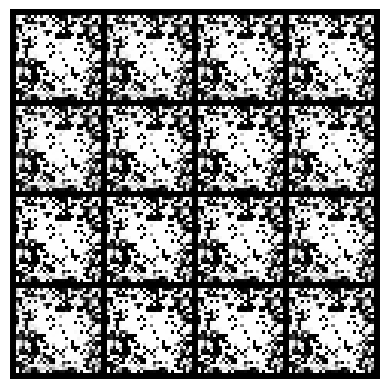

Epoch [131/200]  D_loss: 0.0011  G_loss: 6.9757
Epoch [132/200]  D_loss: 0.0012  G_loss: 6.8763
Epoch [133/200]  D_loss: 0.0014  G_loss: 6.7689
Epoch [134/200]  D_loss: 0.0015  G_loss: 6.6878
Epoch [135/200]  D_loss: 0.0021  G_loss: 6.4084
Epoch [136/200]  D_loss: 0.0104  G_loss: 5.4190
Epoch [137/200]  D_loss: 0.0135  G_loss: 5.6971
Epoch [138/200]  D_loss: 0.0037  G_loss: 6.1827
Epoch [139/200]  D_loss: 0.0048  G_loss: 5.9358
Epoch [140/200]  D_loss: 0.0378  G_loss: 4.7445


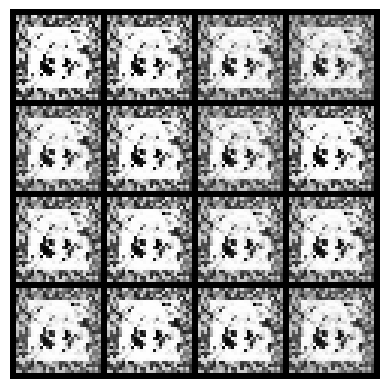

Epoch [141/200]  D_loss: 0.0146  G_loss: 5.3689
Epoch [142/200]  D_loss: 0.0142  G_loss: 5.1187
Epoch [143/200]  D_loss: 0.0210  G_loss: 5.1059
Epoch [144/200]  D_loss: 0.0123  G_loss: 5.3931
Epoch [145/200]  D_loss: 0.0077  G_loss: 5.7358
Epoch [146/200]  D_loss: 0.0096  G_loss: 5.4772
Epoch [147/200]  D_loss: 0.0088  G_loss: 5.6229
Epoch [148/200]  D_loss: 0.0085  G_loss: 5.5524
Epoch [149/200]  D_loss: 0.0840  G_loss: 5.3207
Epoch [150/200]  D_loss: 0.0105  G_loss: 5.5475


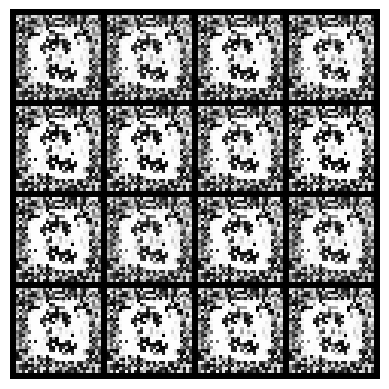

Epoch [151/200]  D_loss: 0.0137  G_loss: 6.0251
Epoch [152/200]  D_loss: 0.0056  G_loss: 6.3675
Epoch [153/200]  D_loss: 0.0153  G_loss: 5.4792
Epoch [154/200]  D_loss: 0.0001  G_loss: 10.6097
Epoch [155/200]  D_loss: 0.0175  G_loss: 5.2992
Epoch [156/200]  D_loss: 0.0168  G_loss: 5.1944
Epoch [157/200]  D_loss: 0.0109  G_loss: 5.5404
Epoch [158/200]  D_loss: 0.0182  G_loss: 5.3457
Epoch [159/200]  D_loss: 0.0089  G_loss: 5.7255
Epoch [160/200]  D_loss: 0.0068  G_loss: 6.0564


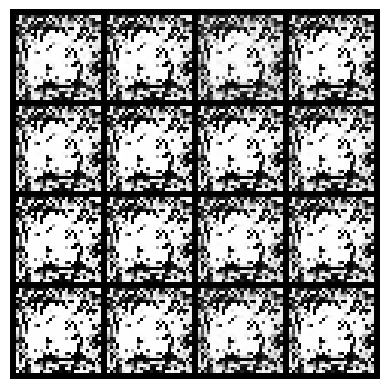

Epoch [161/200]  D_loss: 0.0069  G_loss: 5.9049
Epoch [162/200]  D_loss: 0.0082  G_loss: 5.8024
Epoch [163/200]  D_loss: 0.0170  G_loss: 4.9804
Epoch [164/200]  D_loss: 0.0076  G_loss: 5.6773
Epoch [165/200]  D_loss: 0.0144  G_loss: 5.3893
Epoch [166/200]  D_loss: 0.0300  G_loss: 4.9932
Epoch [167/200]  D_loss: 0.0079  G_loss: 5.7437
Epoch [168/200]  D_loss: 0.0037  G_loss: 6.2618
Epoch [169/200]  D_loss: 0.0103  G_loss: 5.3175
Epoch [170/200]  D_loss: 0.0058  G_loss: 5.7866


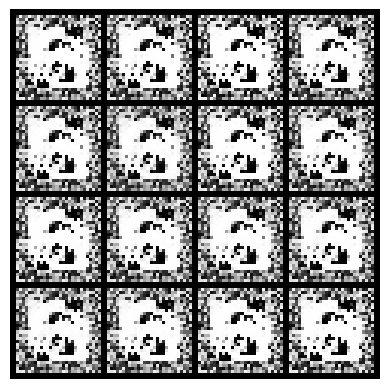

Epoch [171/200]  D_loss: 0.0025  G_loss: 6.3650
Epoch [172/200]  D_loss: 0.0020  G_loss: 6.5458
Epoch [173/200]  D_loss: 0.0017  G_loss: 6.6802
Epoch [174/200]  D_loss: 0.0040  G_loss: 6.1947
Epoch [175/200]  D_loss: 0.0151  G_loss: 6.0863
Epoch [176/200]  D_loss: 0.0018  G_loss: 6.5236
Epoch [177/200]  D_loss: 0.0187  G_loss: 5.6405
Epoch [178/200]  D_loss: 0.0076  G_loss: 5.9350
Epoch [179/200]  D_loss: 0.0036  G_loss: 6.2332
Epoch [180/200]  D_loss: 0.0019  G_loss: 6.6660


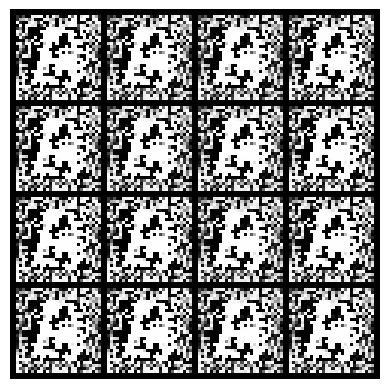

Epoch [181/200]  D_loss: 0.0014  G_loss: 6.8734
Epoch [182/200]  D_loss: 0.0011  G_loss: 7.0815
Epoch [183/200]  D_loss: 0.0011  G_loss: 7.0351
Epoch [184/200]  D_loss: 0.0007  G_loss: 7.4601
Epoch [185/200]  D_loss: 0.0007  G_loss: 7.4311
Epoch [186/200]  D_loss: 0.0007  G_loss: 7.3943
Epoch [187/200]  D_loss: 0.0007  G_loss: 7.4112
Epoch [188/200]  D_loss: 0.0007  G_loss: 7.4372
Epoch [189/200]  D_loss: 0.0006  G_loss: 7.6325
Epoch [190/200]  D_loss: 0.0007  G_loss: 7.4881


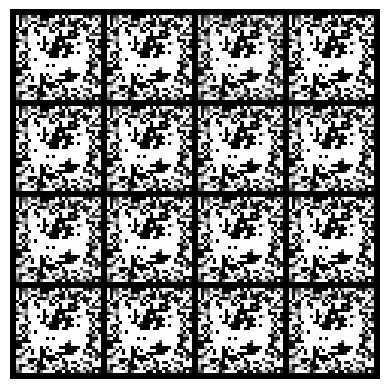

Epoch [191/200]  D_loss: 0.0010  G_loss: 7.0406
Epoch [192/200]  D_loss: 0.0005  G_loss: 7.6634
Epoch [193/200]  D_loss: 0.0006  G_loss: 7.6343
Epoch [194/200]  D_loss: 0.0004  G_loss: 7.9564
Epoch [195/200]  D_loss: 0.0004  G_loss: 7.8866
Epoch [196/200]  D_loss: 0.0004  G_loss: 7.9060
Epoch [197/200]  D_loss: 0.0003  G_loss: 8.0634
Epoch [198/200]  D_loss: 0.0003  G_loss: 8.1163
Epoch [199/200]  D_loss: 0.0003  G_loss: 8.2768
Epoch [200/200]  D_loss: 0.0004  G_loss: 8.0238


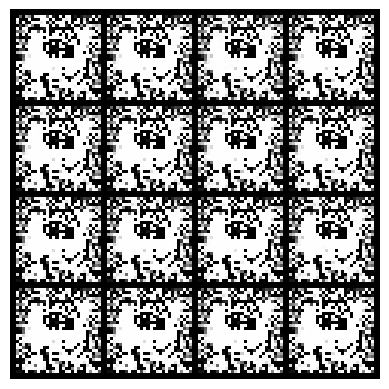

In [25]:
# Entraînement
for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels réels et faux
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # ----- Discriminateur -----
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        real_loss = criterion(discriminator(real_imgs), real)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake)
        d_loss = real_loss + fake_loss

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # ----- Générateur -----
        gen_loss = criterion(discriminator(fake_imgs), real)

        opt_G.zero_grad()
        gen_loss.backward()
        opt_G.step()

    print(
        f"Epoch [{epoch + 1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {gen_loss.item():.4f}"
    )

    # Affichage de quelques images générées
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim).to(device)
            gen_imgs = generator(test_z).cpu()
            grid = torchvision.utils.make_grid(gen_imgs, nrow=4, normalize=True)
            plt.imshow(grid.permute(1, 2, 0).numpy())
            plt.axis("off")
            plt.show()